In [1]:
import numpy as np
import keras 
import cv2
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from keras.models import load_model

In [3]:
model = load_model('finalized_typecrop_disease.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.




In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 3591      
Total params: 40,934,215
Trainable params: 33,298,951
Non-trainable params: 7,635,264
__________________________________

In [5]:
from keras import models
from keras import layers
from keras import optimizers


In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [7]:
img3 = cv2.imread('/home/asus/Desktop/Dataset_splits/test//Pepper__bell___Bacterial_spot/anu223.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img3 = cv2.resize(img3,(224,224))
img4 = np.reshape(img3,[1,224,224,3])


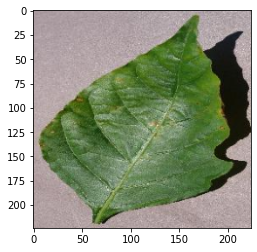

In [8]:
plt.imshow(img3)
plt.show()

In [9]:
disease = model.predict_classes(img4)
prediction = disease[0]
print(prediction)

3


In [11]:
reverse_mapping = ['Paddy', 'corn', 'groundnut', 'pepperbell', 'pomogrnate', 'potato', 'tomato']

In [12]:
prediction_name = reverse_mapping[prediction]
prediction_name

'pepperbell'